<a href="https://colab.research.google.com/github/FengboMa/IE_7275_Data_Mining_work/blob/main/Porject_1_Gorup_6_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Class note:
follow the **loop**

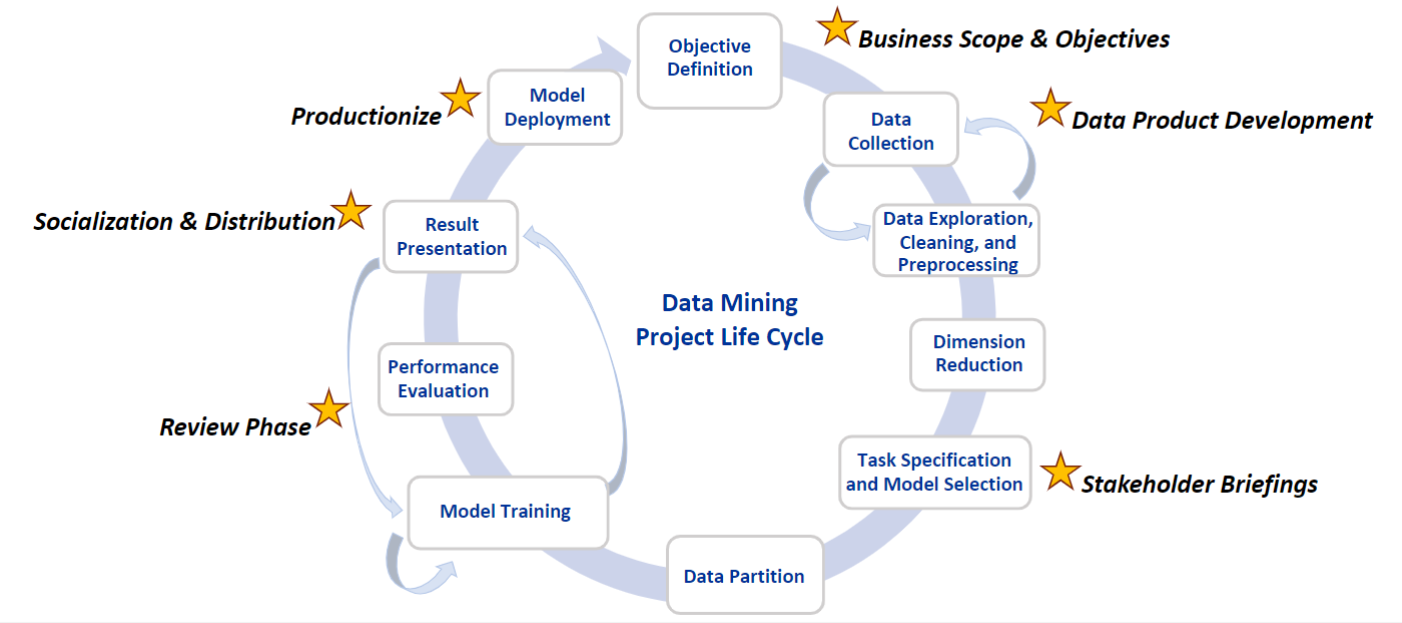
1. pretend a function group introduction
2. pretend to have a timeline
3. Stakeholders
4. appendix if needed




---------------------------

#Project 1 Group 6

#Group Six Therapeutic

##Diabetes survey responses from cleaned BRFSS 2015

Logo:

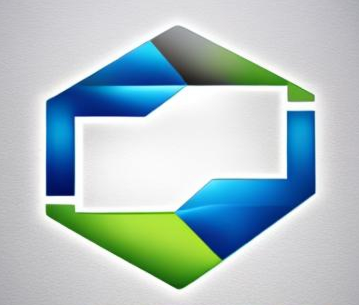

##Introduction

Healthcare, in its continuous evolution, increasingly benefits from the insights derived through data analysis. This data mining project focuses on the "Health Dataset," specifically the "diabetes_data" subset available on Kaggle. In our quest to enhance predictive healthcare analytics, we aim to leverage this dataset to gain deeper insights into the factors associated with diabetes, hypertension, and stroke.

###Overview

1. **About the Dataset:**
   The dataset, titled "Health Dataset," and more specifically, the "diabetes_data" subset, is available on Kaggle. It comprises a collection of health-related data points, likely including features such as age, BMI, blood pressure, and other relevant parameters. The dataset is structured to facilitate the exploration and analysis of factors associated with diabetes, hypertension, and stroke.

2. **Problem Statement:**
   The core problem being addressed in this data mining project is the prediction of diabetes based on health-related features. The goal is to identify patterns and relationships within the dataset that can be used to build a classification model capable of determining whether an individual is likely to have diabetes or not. Additionally, the analysis may extend to exploring factors associated with hypertension and stroke, providing a comprehensive understanding of these health conditions.

3. **Prediction Target:**
   The primary focus of the prediction task is to determine the likelihood of an individual having diabetes. The target variable for the classification model is "Diabetes," which will be binary, with 0 indicating the absence of diabetes and 1 indicating the presence of diabetes.

4. **Scope of the Project:**
   The scope of this data mining project encompasses:
   - Exploration of the dataset to understand the distribution of features and identify potential correlations with diabetes.
   - Preprocessing steps, including handling missing data, scaling, and encoding categorical variables.
   - Feature selection or engineering to enhance the predictive power of the model.
   - Building a classification model (e.g., logistic regression, decision trees, or machine learning algorithms) to predict diabetes based on selected features.
   - Evaluation of the model's performance using appropriate metrics such as accuracy, precision, recall, and F1 score.
   - Exploration of factors associated with hypertension and stroke if relevant features are available in the dataset.
   - Providing actionable insights for healthcare professionals and stakeholders based on the developed model.
   - Documentation and communication of findings to facilitate future research or interventions in the domain of diabetes prediction and healthcare.

###Dataset Description

**Data obtained from:**

https://www.kaggle.com/datasets/prosperchuks/health-dataset/data

(Diabetes dataset only)

**Offical description of the dataset:**

*The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year 2015 was used. This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.*

**Understanding the issue:**

Diabetes, a widespread chronic illness, significantly impacts numerous Americans each year, posing a substantial economic challenge. This condition, marked by the body's inability to properly control blood glucose levels, can lead to decreased quality of life and shorter life expectancy. During digestion, foods are converted into sugars, which enter the bloodstream. This triggers the pancreas to produce insulin, a hormone that assists body cells in utilizing these sugars for energy. The hallmark of diabetes is the body's inability to produce sufficient insulin or to use the insulin effectively.

###Understand Column Meaning

**Age** - 13-level age category (_AGEG5YR see codebook)

**Sex** - patient's gender (1: male; 0: female)

**HighChol** - 0 = no high cholesterol 1 = high cholesterol

**CholCheck** - 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

**BMI** - Body Mass Index

**Smoke** - Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes

**HeartDiseaseorAttack** - coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

**PhysActivity** - physical activity in past 30 days - not including job 0 = no 1 = yes

**Fruits** - Consume Fruit 1 or more times per day 0 = no 1 = yes

**Veggies** - Consume Vegetables 1 or more times per day 0 = no 1 = yes

**HvyAlcoholConsump** = (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes

**GenHlth** - Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

**MentHlth** - days of poor mental health scale 1-30 days

**PhysHlth** - physical illness or injury days in past 30 days scale 1-30

**DiffWalk** - Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

**Stroke** - you ever had a stroke. 0 = no, 1 = yes

**HighBP** - 0 = no high, BP 1 = high BP

**Diabetes** - 0 = no diabetes, 1 = diabetes


*Notes to Age5YR:*

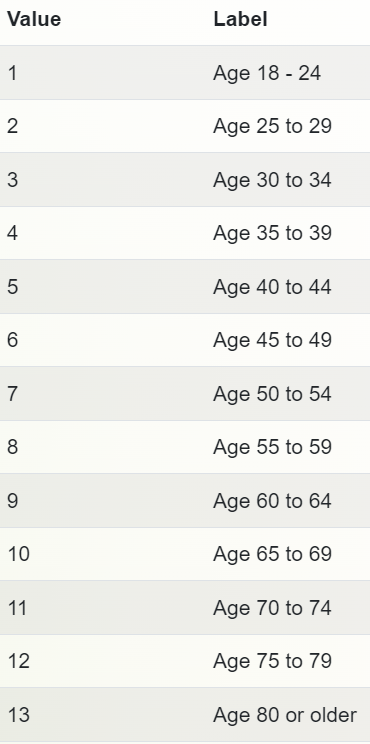



---



##Import libraries & dataset

###Import Libraries

In [125]:
#Import all the necessary packages

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import *
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.manifold import TSNE

###Custom Functions

In [62]:
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.0f')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

###Load Data

In [63]:
from google.colab import files
df = files.upload()

df=pd.read_csv('diabetes_data.csv')

df.head()

Saving diabetes_data.csv to diabetes_data (1).csv


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


####Check Data Type


In [64]:
df.dtypes

Age                     float64
Sex                     float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Stroke                  float64
HighBP                  float64
Diabetes                float64
dtype: object

####Convert Datatype

In [65]:
# Convert specific columns to binary
columns_to_convert = ['Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'DiffWalk', 'Sex']
df[columns_to_convert] = df[columns_to_convert].astype(bool)

####Re-check Datatype

In [66]:
df.dtypes

Age                     float64
Sex                        bool
HighChol                   bool
CholCheck                  bool
BMI                     float64
Smoker                     bool
HeartDiseaseorAttack       bool
PhysActivity               bool
Fruits                     bool
Veggies                    bool
HvyAlcoholConsump          bool
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                   bool
Stroke                     bool
HighBP                     bool
Diabetes                   bool
dtype: object

###Data Description

####Missing Value Check

In [67]:
# Check for missing values
missing_values = df.isnull()

# Count missing values in each column
missing_count = missing_values.sum()

# Display the missing values count
print("Missing values in each column:")
print(missing_count)

Missing values in each column:
Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64


We have **zero** missing value in the dataframe. Good to proceed.

####Duplication Check

In [68]:
df[df.duplicated()]

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
360,6.0,True,False,True,28.0,False,False,True,True,True,False,2.0,0.0,0.0,False,False,False,False
397,8.0,False,False,True,29.0,False,False,True,False,True,False,2.0,0.0,0.0,False,False,True,False
436,8.0,True,False,True,27.0,False,False,True,True,True,False,1.0,0.0,0.0,False,False,False,False
514,9.0,False,False,True,22.0,False,False,True,True,True,False,1.0,0.0,0.0,False,False,False,False
525,7.0,False,False,True,27.0,True,False,True,True,True,False,1.0,0.0,0.0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70591,10.0,True,True,True,30.0,False,True,True,True,True,False,2.0,0.0,0.0,False,False,True,True
70621,10.0,False,False,True,30.0,True,False,True,False,True,False,3.0,0.0,0.0,False,False,True,True
70640,6.0,True,False,True,37.0,False,False,True,True,True,False,3.0,0.0,0.0,False,False,True,True
70642,10.0,False,True,True,35.0,False,False,False,False,True,False,4.0,0.0,0.0,False,False,True,True


We do **NOT** remove the duplication at this point due to the following reasons:

1. The feature contain bin-lized and binary feature, duplication will accure even if only by randomlization.
2. To ensure the equality of a health related study, the record for each patient should be traded equally. That means each data should not be removed.
3. There are no columns need to be trade as unique value (such as ID). Do need to remove duplication.



---



##Data Exploration

####Class Distribution Bar Plot

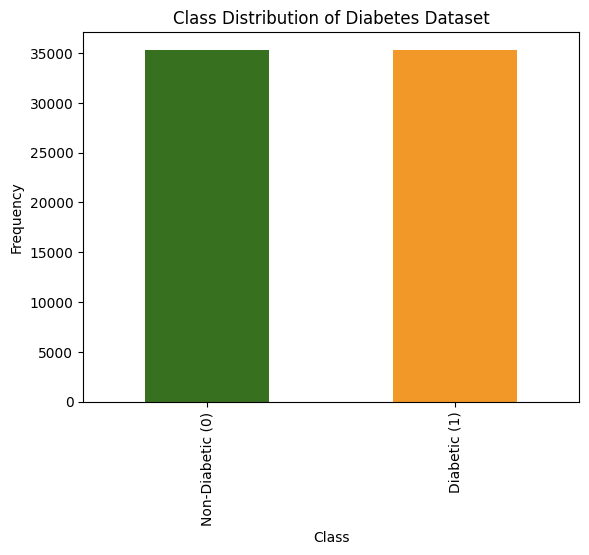

In [9]:
# Assuming df is your pandas DataFrame and 'Diabetes' is the column of interest
class_counts = df['Diabetes'].value_counts()

# Create a bar plot
class_counts.plot(kind='bar', color=['#377120','#f29829'])

# Setting the title and labels
plt.title('Class Distribution of Diabetes Dataset')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=[0, 1], labels=['Non-Diabetic (0)', 'Diabetic (1)'])  # Assuming 0 is Non-Diabetic, 1 is Diabetic
plt.show()


In [10]:
count_of_zeros = (df['Diabetes'] == 0).sum()
count_of_ones = (df['Diabetes'] == 1).sum()

print(f"Number of Non-Diabetic (0): {count_of_zeros}")
print(f"Number of Diabetic (1): {count_of_ones}")

Number of Non-Diabetic (0): 35346
Number of Diabetic (1): 35346


**Observation:**

1. We are having balanced classes between diabeties and non-diabetes
2. Two class are have the same number
3. Since the two classes are balance, accuracy can be used as confusion matrix.

####Boxplot of Age by Diabete Class

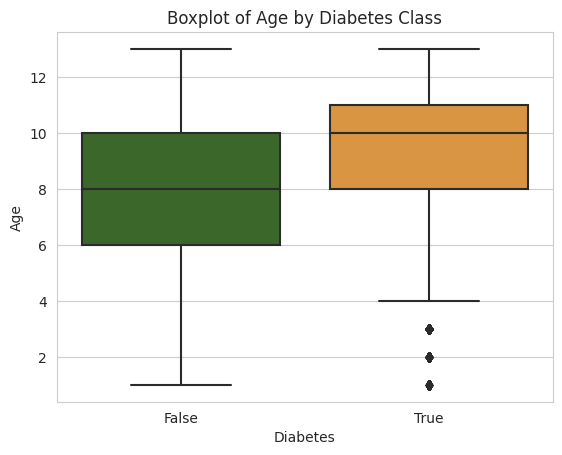

In [19]:
#### Set the aesthetic style of the plots
sns.set_style("whitegrid")


sns.boxplot(x='Diabetes', y='Age', data=df, palette=['#377120','#f29829'])
plt.title(f'Boxplot of Age by Diabetes Class')
plt.show()


**Observation:**
1. By reading the plot, we see the fact that, diabetes increase as the age goes up.
2. Accoring to the year 5 age book, 10 is representing 65 to 69 age group, where is the median age of getting diabetes.
3. There are minor people in younger ages with diabetes.
4. Comparing the distribution of two classes, Diabete group are with smaller variance.

####Pie Chart of Gender by Classes

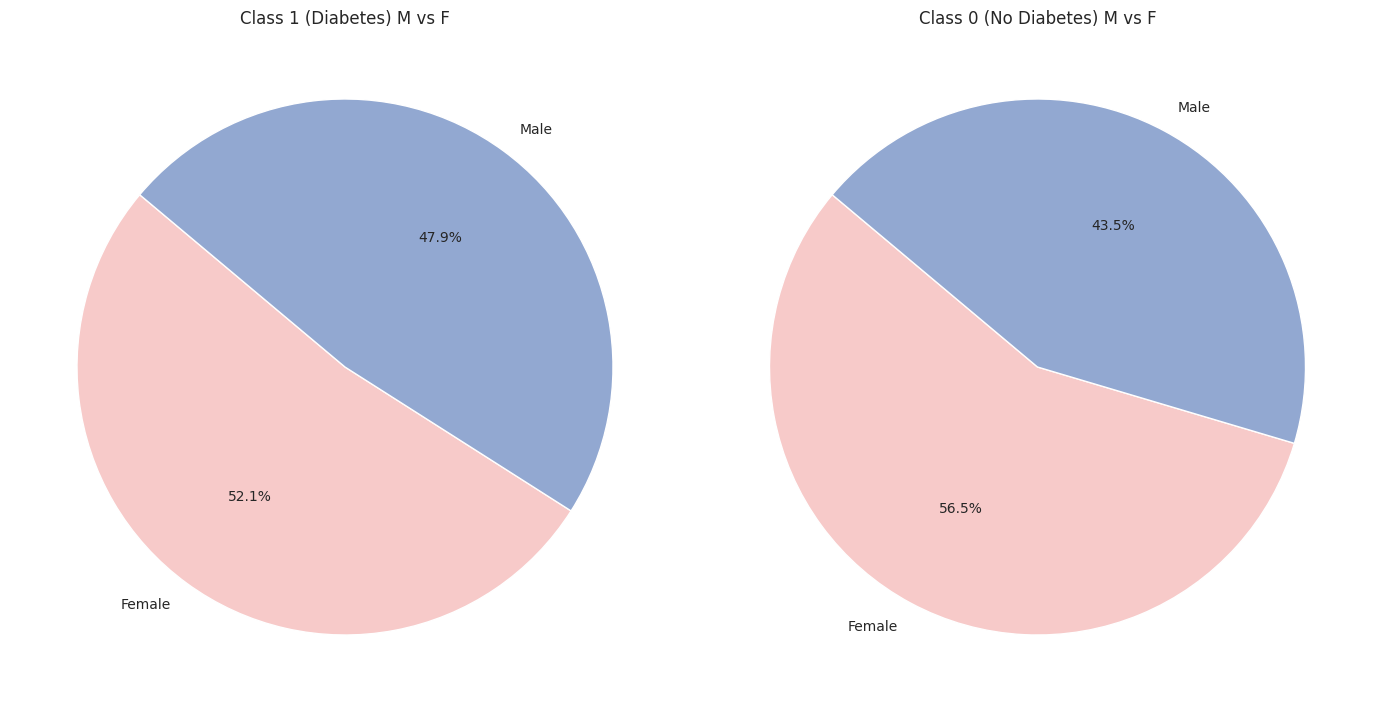

In [13]:
#pie chart

# Define the color palette
color_palette = ['#f7cac9', '#92a8d1']
# We will use the first two colors for male and female in the pie charts
colors = color_palette[:2]

# Assuming df is your DataFrame and it contains 'Diabetes' for class and 'Sex' for gender (0 for female and 1 for male)

# Filter the data by class for diabetes (class 1) and no diabetes (class 0)
class_1 = df[df['Diabetes'] == 1]
class_0 = df[df['Diabetes'] == 0]

# Count the number of males and females in each class
class_1_counts = class_1['Sex'].value_counts().sort_index()
class_0_counts = class_0['Sex'].value_counts().sort_index()

# Create pie charts
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for class 1 (Diabetes)
ax[0].pie(class_1_counts, labels=['Female', 'Male'], autopct='%1.1f%%', colors=colors, startangle=140)
ax[0].set_title('Class 1 (Diabetes) M vs F')

# Pie chart for class 0 (No Diabetes)
ax[1].pie(class_0_counts, labels=['Female', 'Male'], autopct='%1.1f%%', colors=colors, startangle=140)
ax[1].set_title('Class 0 (No Diabetes) M vs F')

# Show the plot
plt.tight_layout()
plt.show()



**Observations:**

1. Since we already know the class is balanced, that means in the entire survey, there are more female than male.
2. In the survey, male and female are roughly 50% by 50% in Diabetes group.
3. Similarly, for control group, Female are slightly above in number.

####Distribution of Each Numberical Column and Target

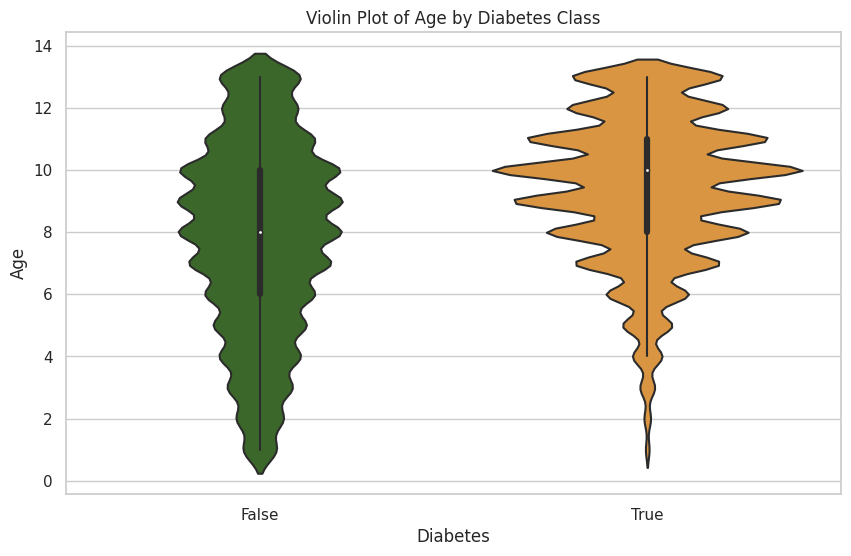

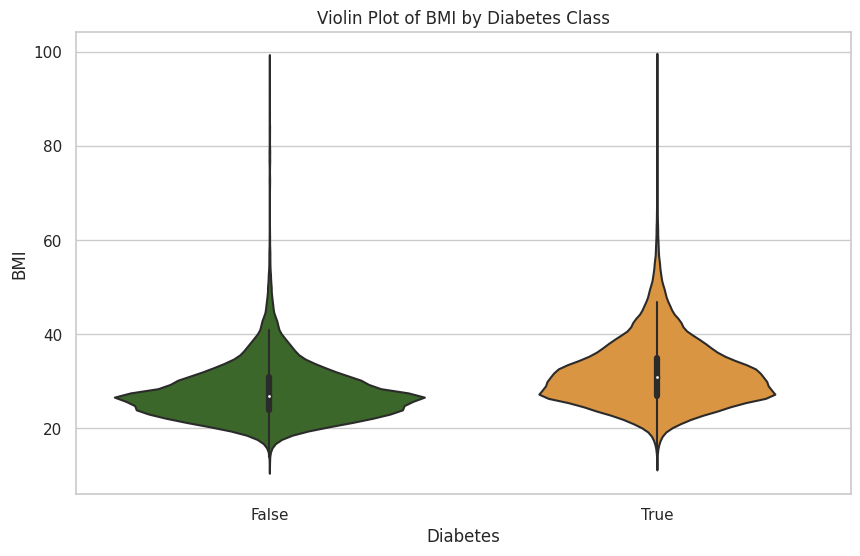

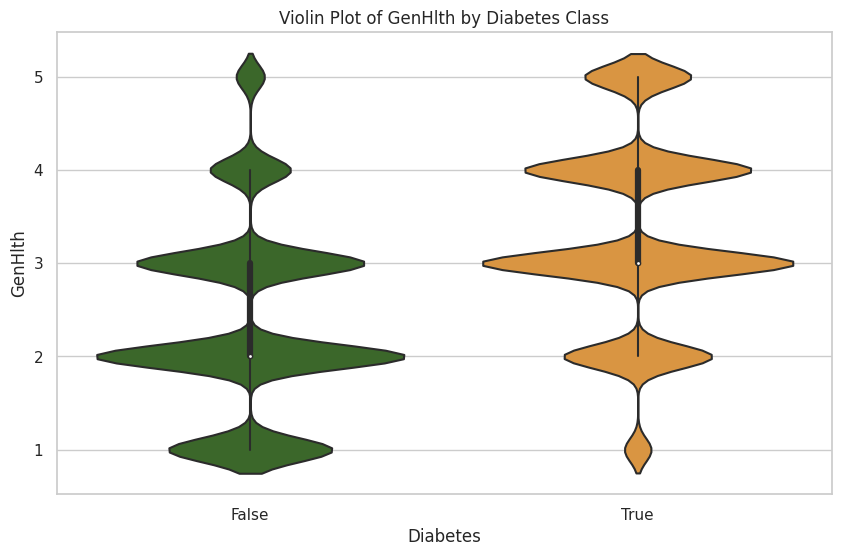

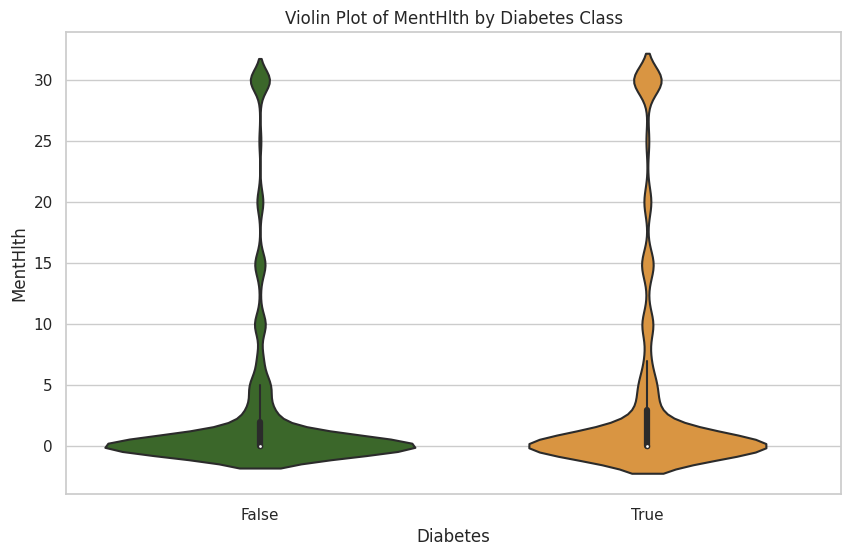

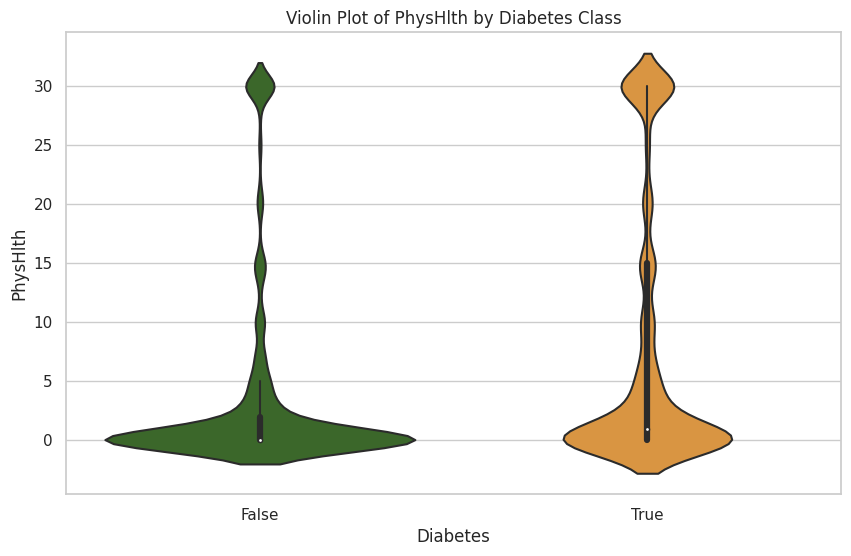

In [20]:

sns.set(style="whitegrid")

# Now let's loop over the columns and create a violin plot for each feature by 'Diabetes' class
for column in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 6))  # Adjust the size of the plot to your preference
    sns.violinplot(x='Diabetes', y=column, data=df, split=True, palette=['#377120','#f29829'])
    plt.title(f'Violin Plot of {column} by Diabetes Class')
    plt.show()


**Observations:**
1. Notice that, our numerical value is not continious. But the violin plot would still give the distribution of each category by class.
2. The age violin plot did verify the fact that elder people seems easier to have diabetes.
3. From BMI plot, people with diabetes have higher BMI.

4. People with diabetes are being considered as worst heath condition.

5. Mental health seems like a less factor for diabetes.

6. In general, people with out diabetes are have better ohysical health condition.



---



##Exploratory Data Analysis (EDA)

###Pair Plot

Text(0.5, 1.0, 'Relationship between selected features and target variable (Diabetes)')

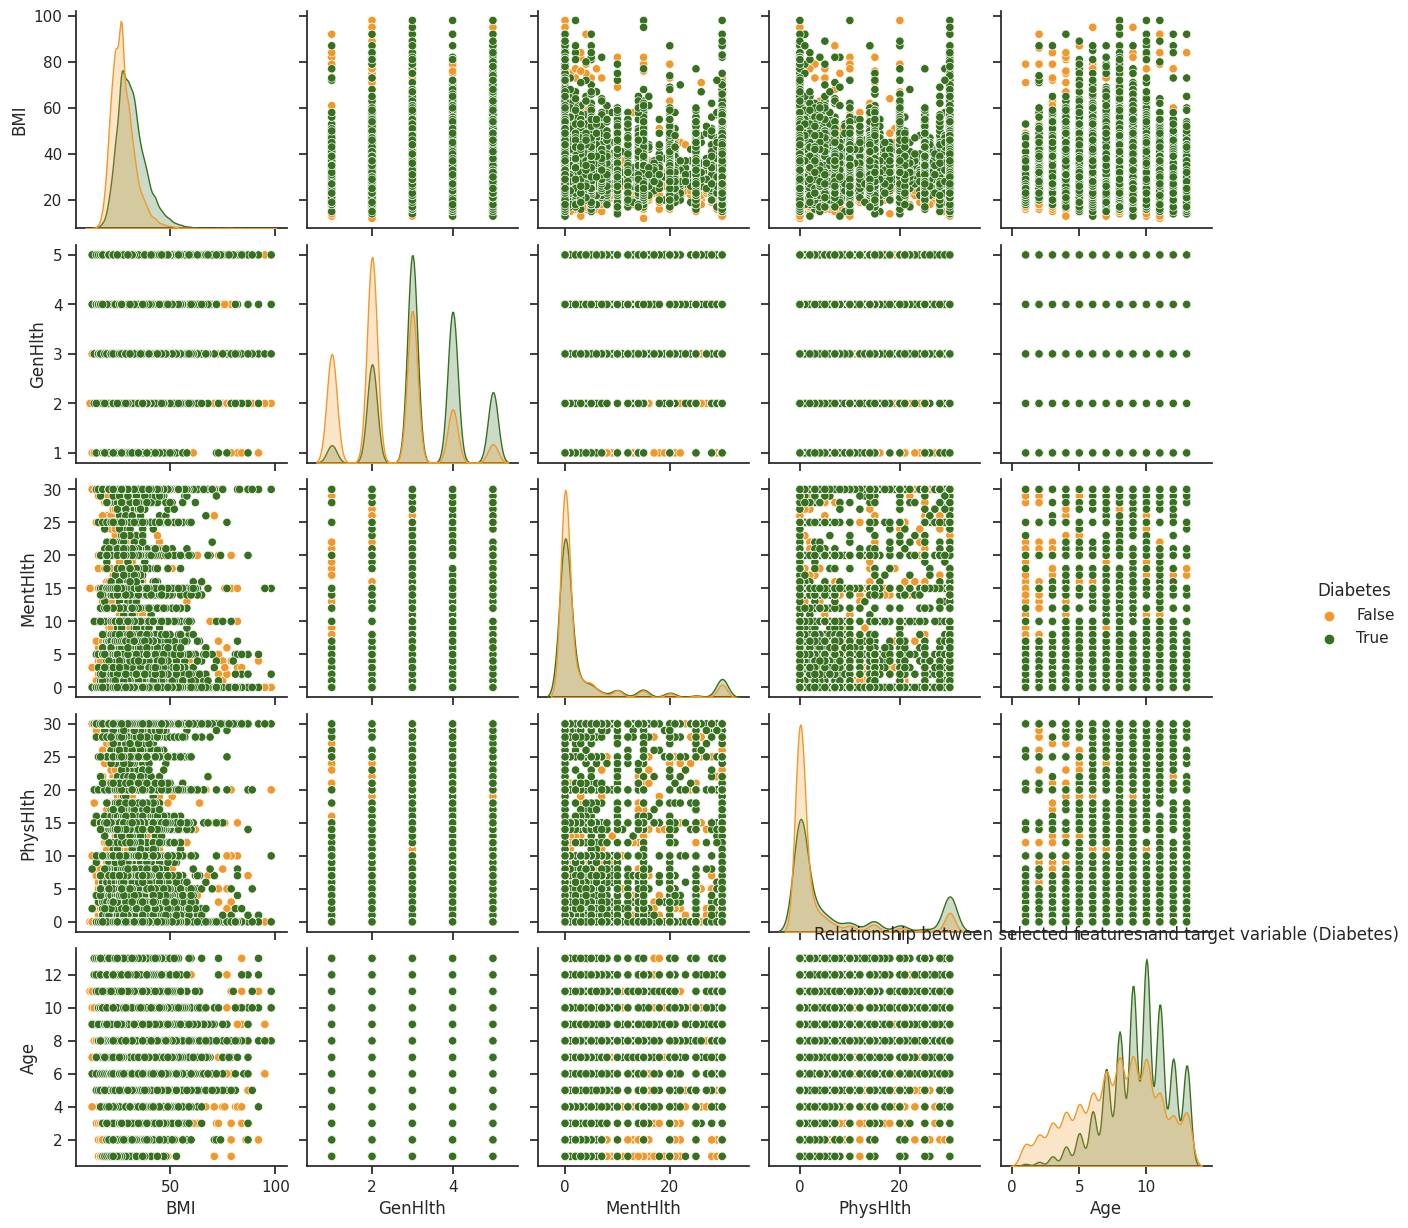

In [21]:
# Select important columns woulf like to plot
dfPlotTwo = df[["Diabetes","BMI","GenHlth","MentHlth","PhysHlth","Age"]]

sns.set_theme(style="ticks")
sns.pairplot(dfPlotTwo, hue= "Diabetes", palette=sns.color_palette(["#f29829", "#377120"]))
plt.title("Relationship between selected features and target variable (Diabetes)")

**Observation:**
1. Only the numerical columns are being reported.
2. The distribution of each numerical column are being represent nicely.

###Correlation Matrix

Text(0.5, 1.0, 'Correlation heatmap of all features and target (Diabetes)')

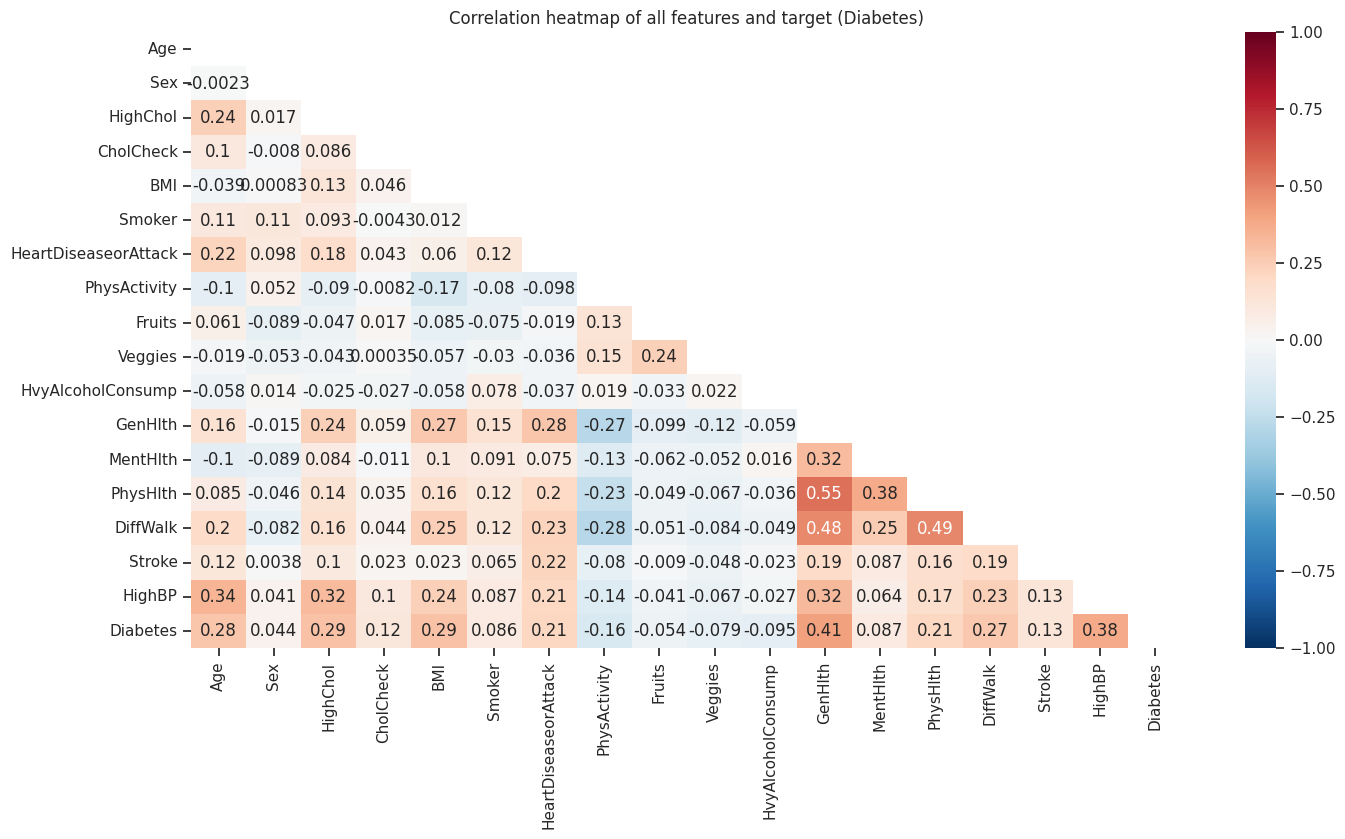

In [ ]:
matrix = np.triu(df.corr())
plt.figure(figsize = (16,8))
sns.heatmap(df.corr(), annot=True, mask=matrix, vmin=-1, vmax=1, cmap="RdBu_r")
plt.title("Correlation heatmap of all features and target (Diabetes)")

**GenHlth** have the highest correlation with the rest of the columns. GenHlth is removed from the study.

In [69]:
df = df.drop('GenHlth', axis=1)

###T-Distributed Stochastic Neighbor Embedding (t-SNE)

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


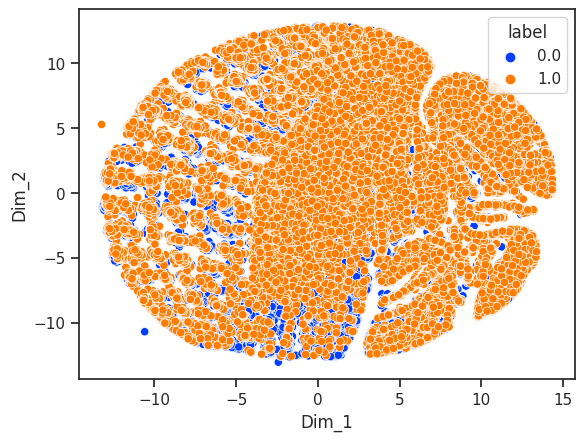

In [128]:
# Create a t-SNE instance
tsne = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=1)

# Fit and transform your high-dimensional data
tsne_result = tsne.fit_transform(df)

# creating a new data frame which
# help us in plotting the result data
tsne_data = np.vstack((tsne_result.T, df['Diabetes'])).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "label"))

# Plotting the result of tsne
sns.scatterplot(data=tsne_df, x='Dim_1', y='Dim_2',
               hue='label', palette="bright")
plt.show()



---



##Train Test Split

In this study, we split dataset as follows:

- Train: 70%
- Dev: 15%
- Test: 15%

In [70]:
X =  df.drop(columns=['Diabetes'])
y = df['Diabetes']

In [71]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=1,shuffle = True)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1,shuffle = True)

In [72]:
print('number of sample in train: ', len(X_train))
print('number of sample in dev: ', len(X_dev))
print('number of sample in test: ', len(X_test))

number of sample in train:  49484
number of sample in dev:  10604
number of sample in test:  10604




---



##Standardlization/Scaling

Scaling done after the train test split to prevent data leakage. We then apply same standard scaler parameter to both X_dev and X_test.

We apply standard deviation scaling to our data. The queation of the scalling method can be found below:

\begin{align}
  z =\frac{ (x - \mu )}{\sigma }
      \end{align}

In [73]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)

X_dev = sc.transform (X_dev)
X_test = sc.transform (X_test)



---



##Dimension Reduction (Principal Components Analysis)

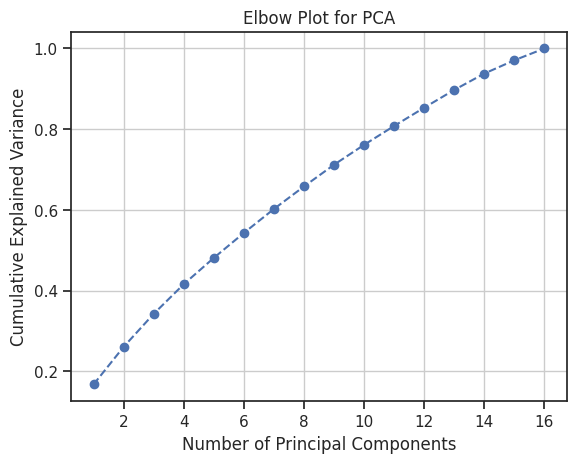

In [74]:
# Perform PCA
pca = PCA()
pca.fit(X_train)

# Calculate the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Create the cumulative explained variance plot (elbow plot)
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Elbow Plot for PCA')
plt.grid()
plt.show()

In [75]:
d = np.argmax(cumulative_variance >= 0.95) + 1

print('95% cumulative variance explained at PC',d)

95% cumulative variance explained at PC 15


1. We deploy PCA at train set and set n to 15
2. Apply same training PCA to dev set to prevent data leak
3. Apply same training PCA to test set to prevent data leak

In [76]:
n_components = 15  # Use 15 as 95% information explained
pca = PCA(n_components=n_components)

X_train_pca = pca.fit_transform(X_train)
X_dev_pca = pca.fit_transform(X_dev)
X_test_pca = pca.fit_transform(X_test)



---



##Logistic Regression

###Logistic Regression Hyperparameter Search on X_dev

In [36]:
# Define the parameter grid
param_grid = {'C': [0.1,0.3, 1.0, 5, 10.0]}

# Create a logistic regression model
logistic_regression = LogisticRegression()

# Create a grid search object
grid_search = GridSearchCV(logistic_regression, param_grid, verbose = 3, scoring = 'accuracy', return_train_score = True )

# Fit the grid search to your data
grid_search.fit(X_dev, y_dev)



Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .........C=0.1;, score=(train=0.737, test=0.744) total time=   0.0s
[CV 2/5] END .........C=0.1;, score=(train=0.741, test=0.727) total time=   0.1s
[CV 3/5] END .........C=0.1;, score=(train=0.735, test=0.749) total time=   0.0s
[CV 4/5] END .........C=0.1;, score=(train=0.741, test=0.731) total time=   0.0s
[CV 5/5] END .........C=0.1;, score=(train=0.739, test=0.739) total time=   0.0s
[CV 1/5] END .........C=0.3;, score=(train=0.737, test=0.745) total time=   0.0s
[CV 2/5] END .........C=0.3;, score=(train=0.741, test=0.727) total time=   0.0s
[CV 3/5] END .........C=0.3;, score=(train=0.735, test=0.749) total time=   0.0s
[CV 4/5] END .........C=0.3;, score=(train=0.741, test=0.732) total time=   0.1s
[CV 5/5] END .........C=0.3;, score=(train=0.739, test=0.739) total time=   0.0s
[CV 1/5] END .........C=1.0;, score=(train=0.737, test=0.745) total time=   0.1s
[CV 2/5] END .........C=1.0;, score=(train=0.741,

In [39]:
grid_search.best_params_

{'C': 1.0}

We use C as 1.

###Logistic Regression (X_train)

In [41]:
# Create Logistic Regression classifier
logreg = LogisticRegression(random_state=1, C = 1)  # You can adjust hyperparameters

# Fit the classifier to the training data
logreg.fit(X_train, y_train)


# Make predictions on the test set
y_test_pred = logreg.predict(X_test)

              precision    recall  f1-score   support

       False       0.74      0.71      0.73      5315
        True       0.72      0.75      0.74      5289

    accuracy                           0.73     10604
   macro avg       0.73      0.73      0.73     10604
weighted avg       0.73      0.73      0.73     10604



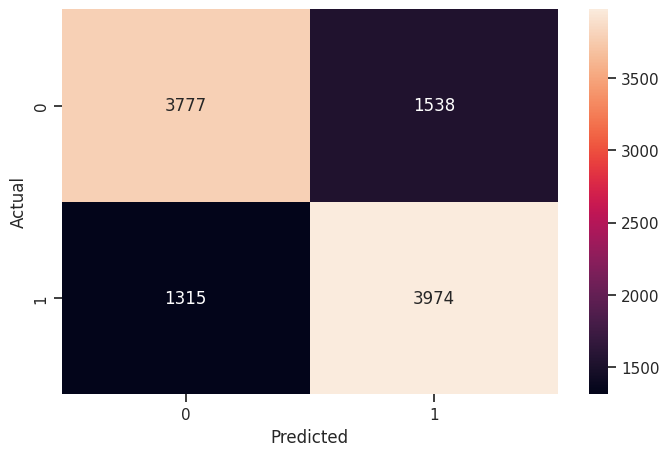

In [42]:
metrics_score(y_test, y_test_pred)

Report on the performance of logistic regression.

###Logistic Regression Hyperparameter Search on X_dev_pca

In [43]:
# Define the parameter grid
param_grid = {'C': [0.1,0.3, 1.0, 5, 10.0]}

# Create a logistic regression model
logistic_regression = LogisticRegression()

# Create a grid search object
grid_search = GridSearchCV(logistic_regression, param_grid, verbose = 3, scoring = 'accuracy', return_train_score = True )

# Fit the grid search to your data
grid_search.fit(X_dev_pca, y_dev)



Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END .........C=0.1;, score=(train=0.734, test=0.744) total time=   0.0s
[CV 2/5] END .........C=0.1;, score=(train=0.738, test=0.726) total time=   0.0s
[CV 3/5] END .........C=0.1;, score=(train=0.734, test=0.746) total time=   0.0s
[CV 4/5] END .........C=0.1;, score=(train=0.739, test=0.722) total time=   0.0s
[CV 5/5] END .........C=0.1;, score=(train=0.736, test=0.736) total time=   0.0s
[CV 1/5] END .........C=0.3;, score=(train=0.734, test=0.744) total time=   0.0s
[CV 2/5] END .........C=0.3;, score=(train=0.739, test=0.727) total time=   0.1s
[CV 3/5] END .........C=0.3;, score=(train=0.734, test=0.747) total time=   0.1s
[CV 4/5] END .........C=0.3;, score=(train=0.739, test=0.723) total time=   0.0s
[CV 5/5] END .........C=0.3;, score=(train=0.736, test=0.736) total time=   0.0s
[CV 1/5] END .........C=1.0;, score=(train=0.734, test=0.744) total time=   0.0s
[CV 2/5] END .........C=1.0;, score=(train=0.739,

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.3, 1.0, 5, 10.0]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [44]:
grid_search.best_params_

{'C': 1.0}

###Logistic Regression (X_train_pca)

In [48]:
logreg_pca = LogisticRegression(random_state=1, C = 1)  # You can adjust hyperparameters

# Fit the classifier on the training data transformed by PCA
logreg_pca.fit(X_train_pca, y_train)


y_test_pca_pred = logreg_pca.predict(X_test_pca)


              precision    recall  f1-score   support

       False       0.67      0.69      0.68      5315
        True       0.68      0.66      0.67      5289

    accuracy                           0.67     10604
   macro avg       0.67      0.67      0.67     10604
weighted avg       0.67      0.67      0.67     10604



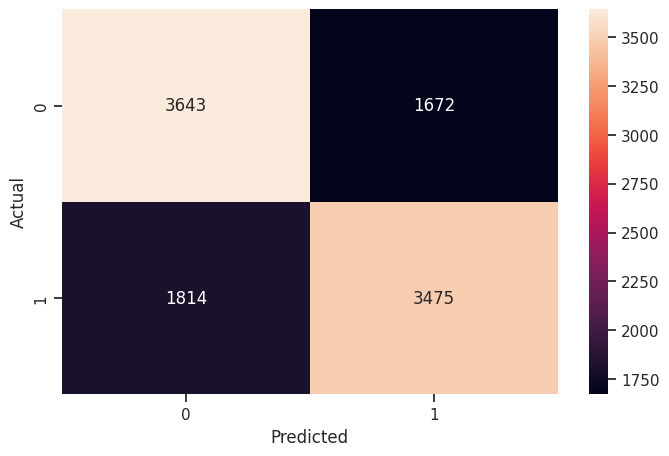

In [49]:
metrics_score(y_test, y_test_pca_pred)



---



##Ridge Logistic Regression

###Ridge Regression Hyperparameter Search on X_dev

In [50]:
# Define the parameter grid
param_grid = {'C': [0.1,0.3, 1.0, 5, 10.0],'penalty': ['l2']}

# Create a logistic regression model
logistic_regression = LogisticRegression()

# Create a grid search object
grid_search = GridSearchCV(logistic_regression, param_grid, verbose = 3, scoring = 'accuracy', return_train_score = True )

# Fit the grid search to your data
grid_search.fit(X_dev, y_dev)



Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END C=0.1, penalty=l2;, score=(train=0.737, test=0.744) total time=   0.1s
[CV 2/5] END C=0.1, penalty=l2;, score=(train=0.741, test=0.727) total time=   0.0s
[CV 3/5] END C=0.1, penalty=l2;, score=(train=0.735, test=0.749) total time=   0.1s
[CV 4/5] END C=0.1, penalty=l2;, score=(train=0.741, test=0.731) total time=   0.1s
[CV 5/5] END C=0.1, penalty=l2;, score=(train=0.739, test=0.739) total time=   0.1s
[CV 1/5] END C=0.3, penalty=l2;, score=(train=0.737, test=0.745) total time=   0.1s
[CV 2/5] END C=0.3, penalty=l2;, score=(train=0.741, test=0.727) total time=   0.1s
[CV 3/5] END C=0.3, penalty=l2;, score=(train=0.735, test=0.749) total time=   0.1s
[CV 4/5] END C=0.3, penalty=l2;, score=(train=0.741, test=0.732) total time=   0.1s
[CV 5/5] END C=0.3, penalty=l2;, score=(train=0.739, test=0.739) total time=   0.0s
[CV 1/5] END C=1.0, penalty=l2;, score=(train=0.737, test=0.745) total time=   0.0s
[CV 2/5] END C=1

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.3, 1.0, 5, 10.0], 'penalty': ['l2']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [51]:
grid_search.best_params_

{'C': 1.0, 'penalty': 'l2'}

###Ridge Regression (X_train)

In [52]:

logreg = LogisticRegression(penalty='l2', solver='liblinear', random_state=1, C = 1)

# Fit the model to the training data
logreg.fit(X_train, y_train)

y_test_pred = logreg.predict(X_test)


              precision    recall  f1-score   support

       False       0.74      0.71      0.73      5315
        True       0.72      0.75      0.74      5289

    accuracy                           0.73     10604
   macro avg       0.73      0.73      0.73     10604
weighted avg       0.73      0.73      0.73     10604



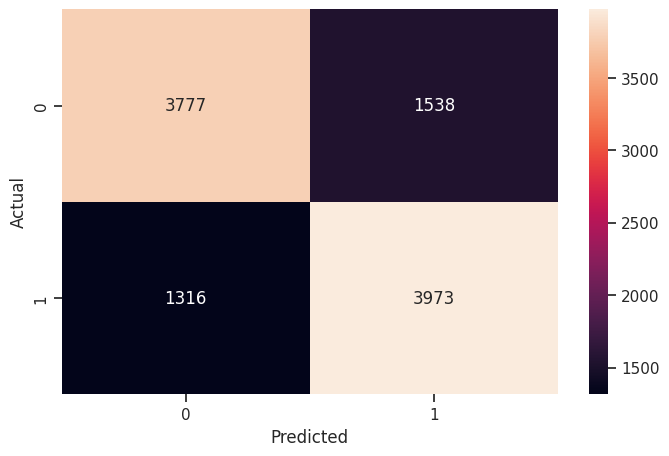

In [53]:
metrics_score(y_test, y_test_pred)

###Ridge Regression Hyperparameter Search on X_dev_pca

In [54]:
# Define the parameter grid
param_grid = {'C': [0.1,0.3, 1.0, 5, 10.0],'penalty': ['l2']}

# Create a logistic regression model
logistic_regression = LogisticRegression()

# Create a grid search object
grid_search = GridSearchCV(logistic_regression, param_grid, verbose = 3, scoring = 'accuracy', return_train_score = True )

# Fit the grid search to your data
grid_search.fit(X_dev_pca, y_dev)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END C=0.1, penalty=l2;, score=(train=0.734, test=0.744) total time=   0.1s
[CV 2/5] END C=0.1, penalty=l2;, score=(train=0.738, test=0.726) total time=   0.0s
[CV 3/5] END C=0.1, penalty=l2;, score=(train=0.734, test=0.746) total time=   0.0s
[CV 4/5] END C=0.1, penalty=l2;, score=(train=0.739, test=0.722) total time=   0.1s
[CV 5/5] END C=0.1, penalty=l2;, score=(train=0.736, test=0.736) total time=   0.1s
[CV 1/5] END C=0.3, penalty=l2;, score=(train=0.734, test=0.744) total time=   0.1s
[CV 2/5] END C=0.3, penalty=l2;, score=(train=0.739, test=0.727) total time=   0.1s
[CV 3/5] END C=0.3, penalty=l2;, score=(train=0.734, test=0.747) total time=   0.1s
[CV 4/5] END C=0.3, penalty=l2;, score=(train=0.739, test=0.723) total time=   0.1s
[CV 5/5] END C=0.3, penalty=l2;, score=(train=0.736, test=0.736) total time=   0.1s
[CV 1/5] END C=1.0, penalty=l2;, score=(train=0.734, test=0.744) total time=   0.0s
[CV 2/5] END C=1

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.3, 1.0, 5, 10.0], 'penalty': ['l2']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [55]:
grid_search.best_params_

{'C': 1.0, 'penalty': 'l2'}

###Ridge Regression (X_train_pca)

In [57]:
logreg = LogisticRegression(penalty='l2', solver='liblinear', random_state=1, C = 1)

# Fit the model to the training data
logreg.fit(X_train_pca, y_train)

y_test_pred = logreg.predict(X_test_pca)


              precision    recall  f1-score   support

       False       0.67      0.69      0.68      5315
        True       0.68      0.66      0.67      5289

    accuracy                           0.67     10604
   macro avg       0.67      0.67      0.67     10604
weighted avg       0.67      0.67      0.67     10604



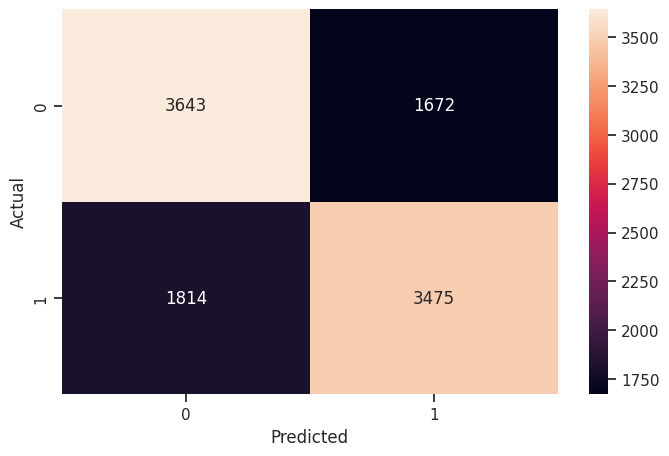

In [58]:
metrics_score(y_test, y_test_pred)



---



##K-Nearest Neighbors (KNN)

####KNN Hyperparameter Search on X_dev

In [78]:
knn = KNeighborsClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, verbose = 3, scoring = 'accuracy', return_train_score = True )

# Fit the grid search to your data
grid_search.fit(X_dev, y_dev)



Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=(train=0.824, test=0.684) total time=   0.4s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=(train=0.826, test=0.678) total time=   0.2s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=(train=0.821, test=0.693) total time=   0.3s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=(train=0.829, test=0.682) total time=   0.2s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=(train=0.826, test=0.681) total time=   0.3s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=(train=0.984, test=0.675) total time=   0.3s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=(train=0.981, test=0.677) total time=   0.2s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=(train=0.982, test=0.684) total time=   0.2s
[CV 4/5] END met

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [80]:
grid_search.best_params_

{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}

###KNN (X_train)

In [81]:
knn = KNeighborsClassifier(n_neighbors=7, weights= 'uniform', metric = 'euclidean')

# Fit the classifier to the training data
knn.fit(X_train, y_train)


# Make predictions on the test set
y_test_pred = knn.predict(X_test)

              precision    recall  f1-score   support

       False       0.72      0.68      0.70      5315
        True       0.70      0.73      0.71      5289

    accuracy                           0.71     10604
   macro avg       0.71      0.71      0.71     10604
weighted avg       0.71      0.71      0.71     10604



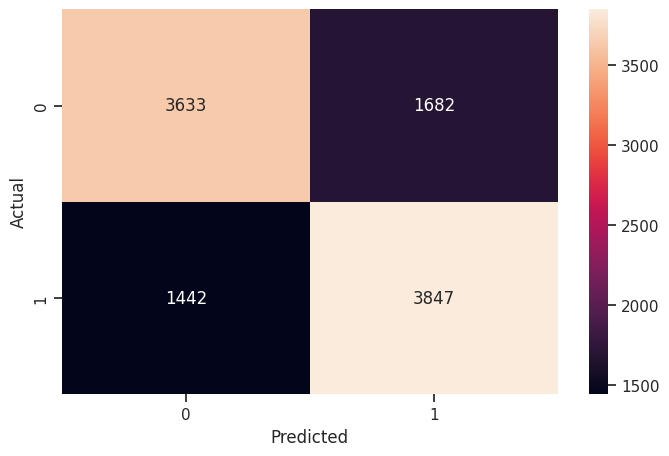

In [82]:
metrics_score(y_test, y_test_pred)

###KNN Hyperparameter Search on X_dev_pca

In [83]:
knn = KNeighborsClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, verbose = 3, scoring = 'accuracy', return_train_score = True )

# Fit the grid search to your data
grid_search.fit(X_dev_pca, y_dev)



Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=(train=0.822, test=0.682) total time=   1.1s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=(train=0.827, test=0.680) total time=   1.0s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=(train=0.822, test=0.698) total time=   0.6s
[CV 4/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=(train=0.827, test=0.681) total time=   0.5s
[CV 5/5] END metric=euclidean, n_neighbors=3, weights=uniform;, score=(train=0.827, test=0.685) total time=   0.5s
[CV 1/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=(train=0.984, test=0.673) total time=   0.6s
[CV 2/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=(train=0.981, test=0.679) total time=   0.5s
[CV 3/5] END metric=euclidean, n_neighbors=3, weights=distance;, score=(train=0.982, test=0.688) total time=   0.3s
[CV 4/5] END met

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy', verbose=3)

In [84]:
grid_search.best_params_

{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}

###KNN (X_train_pca)

In [93]:
# Create KNN classifier for PCA-transformed data
knn_pca = KNeighborsClassifier(n_neighbors=7, metric = 'euclidean', weights = 'uniform')  # You can adjust n_neighbors

# Fit the classifier on the training data transformed by PCA
knn_pca.fit(X_train_pca, y_train)

# Make predictions on the development set (PCA transformed)
y_dev_pca_pred = knn_pca.predict(X_test_pca)


              precision    recall  f1-score   support

       False       0.69      0.67      0.68      5315
        True       0.68      0.69      0.69      5289

    accuracy                           0.68     10604
   macro avg       0.68      0.68      0.68     10604
weighted avg       0.68      0.68      0.68     10604



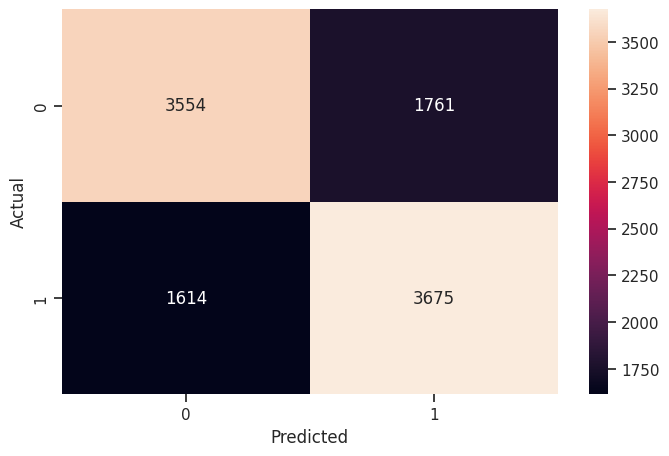

In [94]:
metrics_score(y_test, y_dev_pca_pred)



---



##Decision Tree

###Decision Tree Hyperparameter Search on X_dev

In [97]:
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(dt_classifier, param_grid, verbose = 3, scoring = 'accuracy', return_train_score = True )

# Fit the grid search to your data
grid_search.fit(X_dev, y_dev)



Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=(train=0.984, test=0.634) total time=   0.2s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=(train=0.981, test=0.645) total time=   0.1s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=(train=0.982, test=0.649) total time=   0.2s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=(train=0.983, test=0.646) total time=   0.1s
[CV 5/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=(train=0.983, test=0.631) total time=   0.1s
[CV 1/5] END criterion=gini, max_depth=None, min_samples_split=5;, score=(train=0.917, test=0.638) total time=   0.1s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_split=5;, score=(train=0.915, test=0.653) total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_split=5;, score=(train=0.913, test=0.657) total time=  

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [98]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}

###Decision Tree (X_train)

In [109]:
# Create Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=1, criterion='entropy', max_depth=10, min_samples_split=10)

# Fit the classifier to the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = decision_tree.predict(X_test)


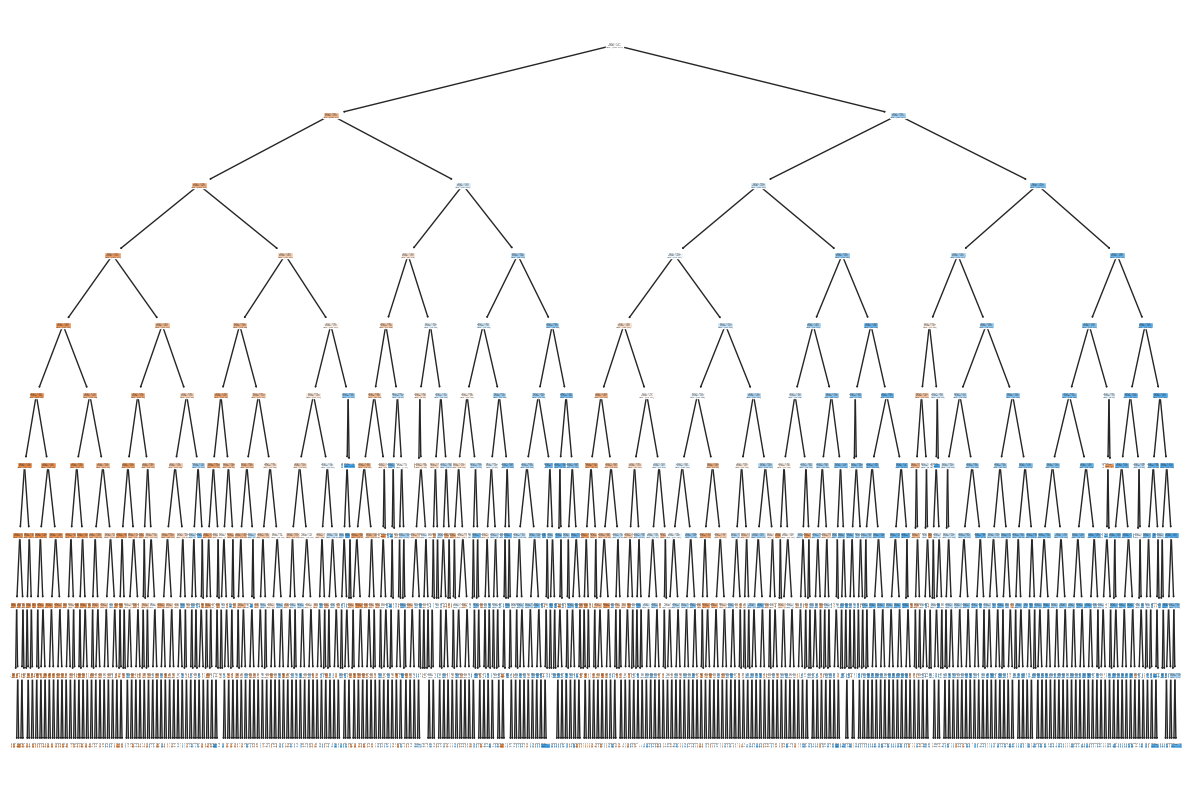

In [110]:
# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(decision_tree, filled=True)
plt.show()

              precision    recall  f1-score   support

       False       0.74      0.68      0.71      5315
        True       0.70      0.76      0.73      5289

    accuracy                           0.72     10604
   macro avg       0.72      0.72      0.72     10604
weighted avg       0.72      0.72      0.72     10604



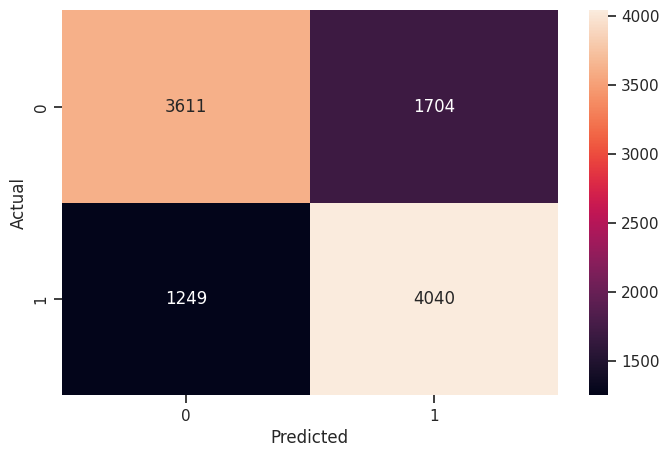

In [111]:
metrics_score(y_test, y_test_pred)

###Decision Tree Hyperparameter Search on X_dev_pca

In [100]:
dt_classifier = DecisionTreeClassifier()

# Define the hyperparameter grid to search
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

# Create the GridSearchCV object
grid_search = GridSearchCV(dt_classifier, param_grid, verbose = 3, scoring = 'accuracy', return_train_score = True )

# Fit the grid search to your data
grid_search.fit(X_dev_pca, y_dev)



Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=(train=0.984, test=0.641) total time=   0.6s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=(train=0.981, test=0.659) total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=(train=0.982, test=0.649) total time=   0.4s
[CV 4/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=(train=0.983, test=0.652) total time=   0.3s
[CV 5/5] END criterion=gini, max_depth=None, min_samples_split=2;, score=(train=0.983, test=0.633) total time=   0.3s
[CV 1/5] END criterion=gini, max_depth=None, min_samples_split=5;, score=(train=0.963, test=0.646) total time=   0.3s
[CV 2/5] END criterion=gini, max_depth=None, min_samples_split=5;, score=(train=0.960, test=0.658) total time=   0.3s
[CV 3/5] END criterion=gini, max_depth=None, min_samples_split=5;, score=(train=0.962, test=0.639) total time=  

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10]},
             return_train_score=True, scoring='accuracy', verbose=3)

In [ ]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10}

###Desision Tree (X_train_pca)

In [112]:
# Create Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=1, criterion='entropy', max_depth=10, min_samples_split=10)

# Fit the classifier to the training data
decision_tree.fit(X_train_pca, y_train)

# Make predictions on the test set
y_test_pred = decision_tree.predict(X_test_pca)


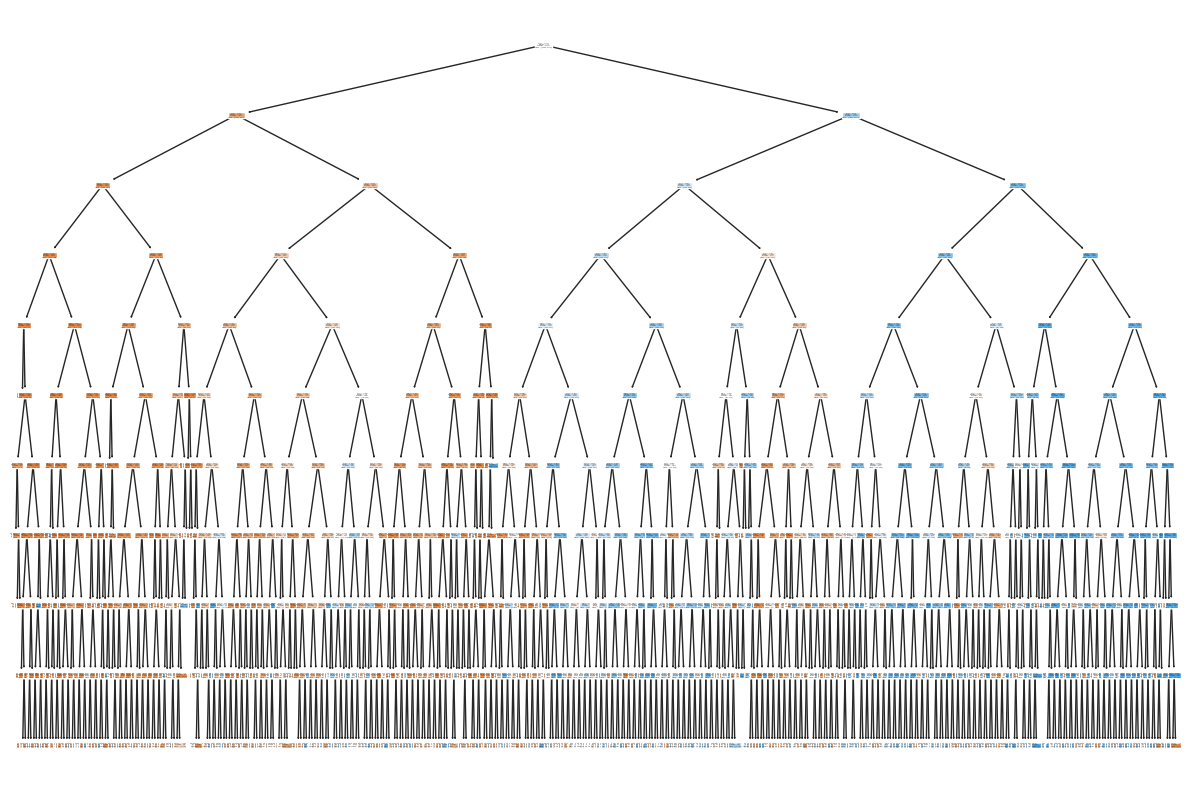

In [113]:
# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(decision_tree, filled=True)
plt.show()

              precision    recall  f1-score   support

       False       0.71      0.63      0.67      5315
        True       0.66      0.74      0.70      5289

    accuracy                           0.68     10604
   macro avg       0.69      0.68      0.68     10604
weighted avg       0.69      0.68      0.68     10604



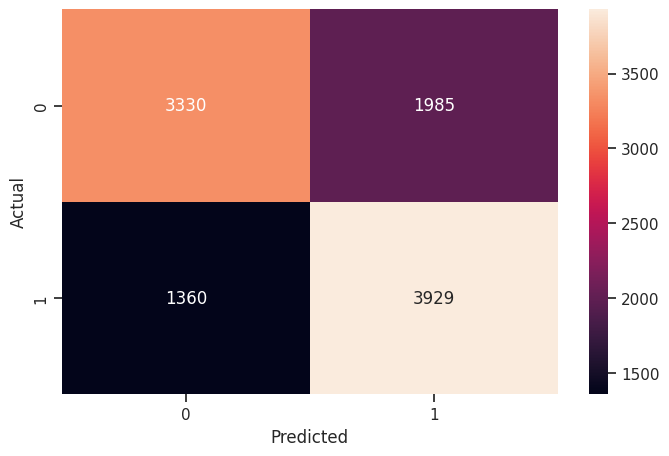

In [114]:
metrics_score(y_test, y_test_pred)



---



##Support Vector Machine (SVM)

###SVM Hyperparameter Search on X_dev

In [115]:
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 0.5, 1, 2, 5, 10]}
svc = SVC()

clf = GridSearchCV(svc, parameters, verbose = 3, scoring = 'accuracy', return_train_score = True )
clf.fit(X_dev,y_dev)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END C=0.1, kernel=linear;, score=(train=0.731, test=0.734) total time=   3.0s
[CV 2/5] END C=0.1, kernel=linear;, score=(train=0.735, test=0.723) total time=   3.2s
[CV 3/5] END C=0.1, kernel=linear;, score=(train=0.730, test=0.736) total time=   3.8s
[CV 4/5] END C=0.1, kernel=linear;, score=(train=0.736, test=0.731) total time=   2.9s
[CV 5/5] END C=0.1, kernel=linear;, score=(train=0.732, test=0.733) total time=   2.9s
[CV 1/5] END C=0.1, kernel=rbf;, score=(train=0.738, test=0.732) total time=   4.8s
[CV 2/5] END C=0.1, kernel=rbf;, score=(train=0.744, test=0.727) total time=   3.6s
[CV 3/5] END C=0.1, kernel=rbf;, score=(train=0.738, test=0.742) total time=   5.0s
[CV 4/5] END C=0.1, kernel=rbf;, score=(train=0.741, test=0.729) total time=   3.6s
[CV 5/5] END C=0.1, kernel=rbf;, score=(train=0.736, test=0.732) total time=   5.1s
[CV 1/5] END C=0.5, kernel=linear;, score=(train=0.731, test=0.733) total time=   4.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 2, 5, 10],
                         'kernel': ('linear', 'rbf')},
             return_train_score=True, scoring='accuracy', verbose=3)

In [116]:
clf.best_params_

{'C': 2, 'kernel': 'rbf'}

We apply Radial basis function kernel SVM to normal X_train

###Radial Basis function (rbf) kernel SVM (X_train)

In [117]:
# Hyperparameter setting
C = 2

# Linear Support Vector Machine (LSVM)
SVM_clf = SVC(kernel='rbf',  C = C, gamma= 'auto',random_state=1)
SVM_clf.fit(X_train,y_train)

SVC(C=2, gamma='auto', random_state=1)

In [118]:
SVM_y_pred = SVM_clf.predict(X_test)

              precision    recall  f1-score   support

       False       0.76      0.67      0.71      5315
        True       0.70      0.79      0.74      5289

    accuracy                           0.73     10604
   macro avg       0.73      0.73      0.73     10604
weighted avg       0.73      0.73      0.73     10604



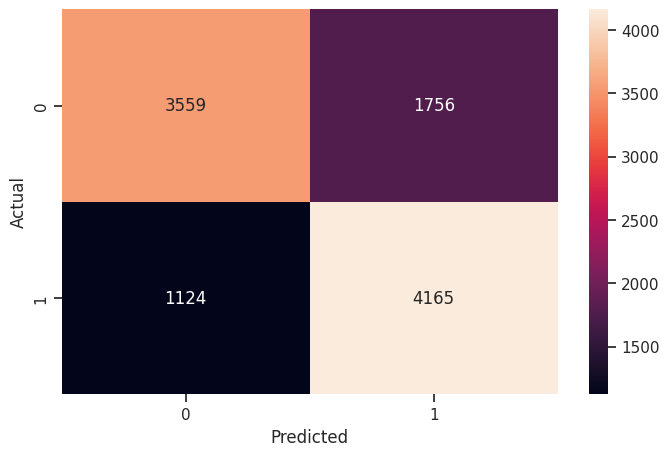

In [119]:
metrics_score(y_test, SVM_y_pred)

###SVM Hyperparameter Search on X_train_pca

In [120]:
parameters = {'kernel':('linear', 'rbf'), 'C':[0.1, 0.5, 1, 2, 5, 10]}
svc = SVC()

clf = GridSearchCV(svc, parameters, verbose = 3, scoring = 'accuracy', return_train_score = True )
clf.fit(X_dev_pca,y_dev)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END C=0.1, kernel=linear;, score=(train=0.730, test=0.733) total time=   3.4s
[CV 2/5] END C=0.1, kernel=linear;, score=(train=0.734, test=0.721) total time=   3.9s
[CV 3/5] END C=0.1, kernel=linear;, score=(train=0.730, test=0.736) total time=   3.4s
[CV 4/5] END C=0.1, kernel=linear;, score=(train=0.735, test=0.731) total time=   7.7s
[CV 5/5] END C=0.1, kernel=linear;, score=(train=0.730, test=0.733) total time=   4.3s
[CV 1/5] END C=0.1, kernel=rbf;, score=(train=0.736, test=0.736) total time=   7.7s
[CV 2/5] END C=0.1, kernel=rbf;, score=(train=0.742, test=0.728) total time=   3.9s
[CV 3/5] END C=0.1, kernel=rbf;, score=(train=0.736, test=0.739) total time=   5.4s
[CV 4/5] END C=0.1, kernel=rbf;, score=(train=0.740, test=0.731) total time=   4.8s
[CV 5/5] END C=0.1, kernel=rbf;, score=(train=0.736, test=0.733) total time=   6.0s
[CV 1/5] END C=0.5, kernel=linear;, score=(train=0.729, test=0.733) total time=   5.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 2, 5, 10],
                         'kernel': ('linear', 'rbf')},
             return_train_score=True, scoring='accuracy', verbose=3)

In [121]:
clf.best_params_

{'C': 0.1, 'kernel': 'rbf'}

We apply Radial basis function kernel SVM to normal X_train_pca with selected C.

###Radial Basis function (rbf) kernel SVM (X_train_pca)

In [122]:
# Hyperparameter setting
C = 0.1

# Linear Support Vector Machine (LSVM)
SVM_clf = SVC(kernel='rbf',  C = C, gamma= 'auto',random_state=1)
SVM_clf.fit(X_train_pca,y_train)

SVC(C=0.1, gamma='auto', random_state=1)

In [123]:
SVM_y_pred = SVM_clf.predict(X_test_pca)

              precision    recall  f1-score   support

       False       0.72      0.67      0.70      5315
        True       0.69      0.74      0.72      5289

    accuracy                           0.71     10604
   macro avg       0.71      0.71      0.71     10604
weighted avg       0.71      0.71      0.71     10604



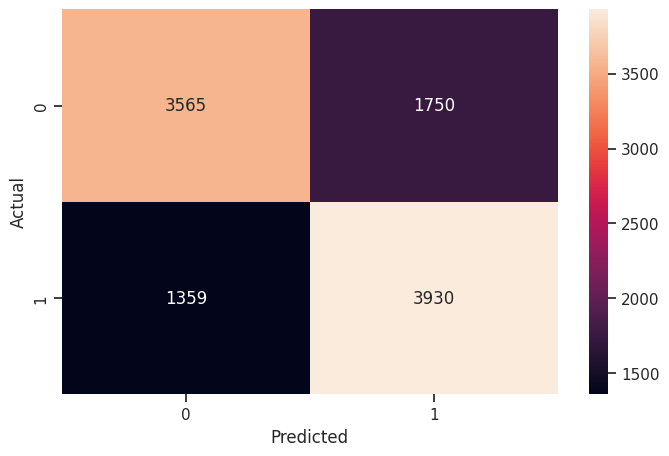

In [124]:
metrics_score(y_test, SVM_y_pred)



---



##Conclusion

This study leverages the 2015 Behavioral Risk Factor Surveillance System (BRFSS) dataset to analyze the effectiveness of various machine learning models in predicting diabetes-related health outcomes. Employing models like Logistic Regression, Ridge Regression, K-Nearest Neighbors, and SVM, the study finds that Logistic Regression and Ridge Regression perform best in terms of accuracy and F1-scores when applied to the original data.

These findings highlight the significance of model selection in healthcare analytics, particularly for chronic conditions like diabetes. The limited impact of PCA on improving model performance suggests that the choice of data preprocessing techniques is crucial and should be tailored to the specific characteristics of the dataset. Future research should focus on exploring different preprocessing methods and model parameters to enhance prediction accuracy in health care data, aiding in the management and understanding of diabetes.

**Precision and Recall**

Precision focuses on the accuracy of positive predictions, with a higher value indicating fewer false positives.
Recall focuses on the ability to capture all positive instances, with a higher value indicating fewer false negatives.

In our case, Diabetes are not offentime being considered as deadly. When we only collecting information over internet, we do not wish to over stress out patients. On the other hand, diabetes is very easy and commercially cheap to detect, our patient might already have prior knowledge on if the have diabetes.

So we care more about **Recall**

**Engineering Decision Score - Evaluation Equation**

Given that we should weight recall more than precision, F1-score would no longer suit for our need. A new evaluation score (Engineering Decision Score)  is define with the following schema:


\begin{align}
  EDS = \frac{Precision + 1.3*Recall + Accuracy}{3.3}
      \end{align}

The final Decision matrix is given as below,


| Model | Precision | Recall | F1-score | Accuracy | EDS |
|----------|----------|----------|----------|----------|----------|
| Logistic Regression (normal) | 0.72 | 0.75 | 0.74 | 0.73 | 0.73
| Logistic Regression (pca) | 0.68 | 0.66 | 0.67 | 0.67 | 0.66
| Ridge Regression (normal) | 0.72 | 0.75 | 0.74 | 0.73 | 0.73
| Ridge Regression (pca) | 0.72 | 0.75 | 0.74 | 0.73 | 0.66
| K-Nearest Neighbors (normal) | 0.70 | 0.73 | 0.71 | 0.71 | 0.71
| K-Nearest Neighbors (pca) | 0.68 | 0.69 | 0.69 | 0.68 | 0.70
| Support Vector Machine (normal) | 0.70 | 0.79 | 0.74 | 0.73 | 0.74
| Support Vector Machine (pca) | 0.69 | 0.74 | 0.72 | 0.71 | 0.72

**Support Vector Machine (normal) with EDS 0.74** has the best performance in the study. Now the model is ready to be wraped with API and pass down to the "real-word" enviorment to try out.